&copy; 2025 by Deitel & Associates, Inc. All Rights Reserved. https://deitel.com

<hr/>

In [1]:
%%html
<style>
    h1 {color:#BB0000}
    h2 {color:purple}
    h3 {color:#0099ff}
    hr {    
        border: 0;
        height: 3px;
        background: #333;
        background-image: linear-gradient(to right, #ccc, black, #ccc);
    }
</style>

<hr/>

# Text Generation Via the Responses API
## Text Summarization
### Creating the `OpenAI` Client Object

In [1]:
from openai import OpenAI 

In [2]:
client = OpenAI()

* If you store your key elsewhere, such as in a file
>```python
> import keys
> client = OpenAI(api_key=keys.OPENAI_API_KEY)
>```

* Assumes your API key is in the environment variable `OPENAI_API_KEY`
* If you used a different environment variable name, replace with preceding statement with
> `client = OpenAI(api_key=os.environ.get("CUSTOM_ENV_NAME"))`

<hr/>

### Loading the Presentation Transcript

In [3]:
from pathlib import Path

In [5]:
transcript_path = Path('resources') / 'transcript.txt' 

In [6]:
transcript = transcript_path.read_text()

### Requesting a Response That Produces a Summary Abstract Paragraph

In [7]:
model_instructions = """Given a Python technical presentation's
    transcript, create a summary abstract paragraph. Use 
    straightforward sentences. Spell language features and 
    function names correctly. Avoid abbreviations. Do not refer 
    to the speaker."""

In [8]:
response = client.responses.create(model='gpt-5-mini', 
    instructions=model_instructions, input=transcript)

### Displaying the Response

In [9]:
print(response.output_text)

This lesson introduces three ways to work with Python interactively and as scripts. The IPython interactive mode lets users enter short snippets of Python code; the interpreter reads, evaluates, prints any results, and then loops, forming a read-evaluate-print loop that is well suited to learning and exploratory data analysis. IPython script mode runs full Python programs stored in .py files, which can define libraries containing function and class definitions and be reused across applications. A demonstration creates a die-rolling visualization that produces a bar plot of face frequencies using Matplotlib. Jupyter Notebook documents, stored with the .ipynb extension, combine runnable Python code with descriptive text, images, and multimedia, making them useful for sharing analyses and for step-by-step machine learning and deep learning workflows. The Jupyter name reflects support for Julia, Python, and R, and the notebook system uses kernels to support many additional languages. Jupyt

### Extracting Key Points

In [10]:
model_instructions = """Given Python technical presentation's
    transcript, present a numbered list of the top 5 key points. 
    Use concise, direct sentences and avoid abbreviations.""" 

In [11]:
response = client.responses.create(model='gpt-5-mini', 
    instructions=model_instructions, input=transcript)

In [12]:
print(response.output_text)

1. IPython interactive mode lets you enter small snippets of Python that are executed immediately in a read-evaluate-print-loop, making it ideal for learning and exploratory data analysis.  
2. IPython script mode runs full Python programs stored in .py files, which can define reusable functions and classes for larger programs.  
3. Jupyter Notebook files with the .ipynb extension are documents that combine executable code, formatted text, images, and results for shareable, step-by-step analyses.  
4. Jupyter supports many languages via kernels, including Julia, Python, and R, and JupyterLab provides an integrated, IDE-like interface that runs locally or in the cloud and edits and executes both .py and notebook files.  
5. Google Colab is a cloud-hosted, notebook-compatible service that lets you run Jupyter notebooks (including machine learning workflows) without installing software and offers a free tier.


### Markdown-Formatted Responses

In [13]:
import IPython
IPython.display.Markdown(response.output_text)

1. IPython interactive mode lets you enter small snippets of Python that are executed immediately in a read-evaluate-print-loop, making it ideal for learning and exploratory data analysis.  
2. IPython script mode runs full Python programs stored in .py files, which can define reusable functions and classes for larger programs.  
3. Jupyter Notebook files with the .ipynb extension are documents that combine executable code, formatted text, images, and results for shareable, step-by-step analyses.  
4. Jupyter supports many languages via kernels, including Julia, Python, and R, and JupyterLab provides an integrated, IDE-like interface that runs locally or in the cloud and edits and executes both .py and notebook files.  
5. Google Colab is a cloud-hosted, notebook-compatible service that lets you run Jupyter notebooks (including machine learning workflows) without installing software and offers a free tier.

## Sentiment Analysis

In [14]:
model_instructions = """You are a sentiment-analysis expert. 
    Determine the provided transcript's sentiment. 
    Explain your analysis."""

In [15]:
response = client.responses.create(model='gpt-5-mini', 
    instructions=model_instructions, input=transcript)

In [16]:
print(response.output_text)

Overall sentiment: Mildly positive / informative (slightly promotional).

Polarity estimate: +0.30 (on a -1 to +1 scale; positive but not strongly emotional)  
Subjectivity estimate: ~0.25–0.35 (mostly objective/explanatory with some positive opinion words)

Why:
- The transcript is primarily instructional and factual — it explains IPython, script mode, Jupyter Notebooks, JupyterLab, and Google Colab in an explanatory way rather than expressing strong emotion.
- Positive language appears in several places, signaling endorsement or enthusiasm (e.g., "great way to learn Python", "powerful visualization library", "nice die-rolling visualization", "really powerful environment", "fully compatible", "free tier"). These words push the sentiment mildly positive.
- There are no negative terms, complaints, or hedging that would indicate negative or mixed sentiment.
- The content balances objective descriptions (features, file extensions, kernel concept, how to run things) with light promotional 

In [17]:
IPython.display.Markdown(response.output_text)

Overall sentiment: Mildly positive / informative (slightly promotional).

Polarity estimate: +0.30 (on a -1 to +1 scale; positive but not strongly emotional)  
Subjectivity estimate: ~0.25–0.35 (mostly objective/explanatory with some positive opinion words)

Why:
- The transcript is primarily instructional and factual — it explains IPython, script mode, Jupyter Notebooks, JupyterLab, and Google Colab in an explanatory way rather than expressing strong emotion.
- Positive language appears in several places, signaling endorsement or enthusiasm (e.g., "great way to learn Python", "powerful visualization library", "nice die-rolling visualization", "really powerful environment", "fully compatible", "free tier"). These words push the sentiment mildly positive.
- There are no negative terms, complaints, or hedging that would indicate negative or mixed sentiment.
- The content balances objective descriptions (features, file extensions, kernel concept, how to run things) with light promotional phrasing about the usefulness and convenience of the tools, producing an overall mildly positive, helpful tone.

Short conclusion: The transcript is mainly neutral-informative but leans positive due to several endorsing adjectives and encouraging phrasing.

## Accessible Image Descriptions

In [18]:
from describe_image import describe_image

### Getting an Accessible Description of a Scenic Aruba Sunset Photo
<img src="./resources/sunset.jpg" width="75%"/>

In [19]:
description = describe_image(client,
    'Provide an accessible description of this Aruba sunset.', 
    Path('resources') / 'sunset.jpg')

In [20]:
print(description)

Short summary (for alt text)
- Golden Aruba sunset over a calm sea: the sun sits just above the horizon behind a low dark cloud, casting a vertical shimmer across the water and silhouetting a small buoy and shoreline posts.

Longer accessible description
- Wide horizontal view of a seaside sunset. The horizon line runs across the lower third of the image. Above it, the sky fills most of the frame in warm tones—deep gold, amber and soft orange—mixed with pale yellows near the sun. The sun is near the center of the picture, partially hidden by a low, dark cloud bank so that a bright, concentrated disk of light peers through a gap. Scattered, darker clouds of varying sizes float across the sky and pick up rim-lighting from the sun, creating contrast between their dusky silhouettes and the glowing background.
- Below the horizon the ocean is calm with gentle texture; it reads as a darker, slate-blue band that becomes a shimmering, golden path where the sun’s light reflects straight toward 

In [21]:
IPython.display.Markdown(description)

Short summary (for alt text)
- Golden Aruba sunset over a calm sea: the sun sits just above the horizon behind a low dark cloud, casting a vertical shimmer across the water and silhouetting a small buoy and shoreline posts.

Longer accessible description
- Wide horizontal view of a seaside sunset. The horizon line runs across the lower third of the image. Above it, the sky fills most of the frame in warm tones—deep gold, amber and soft orange—mixed with pale yellows near the sun. The sun is near the center of the picture, partially hidden by a low, dark cloud bank so that a bright, concentrated disk of light peers through a gap. Scattered, darker clouds of varying sizes float across the sky and pick up rim-lighting from the sun, creating contrast between their dusky silhouettes and the glowing background.
- Below the horizon the ocean is calm with gentle texture; it reads as a darker, slate-blue band that becomes a shimmering, golden path where the sun’s light reflects straight toward the viewer. Near the bottom center a small, dark object—likely a buoy—breaks the reflection. Along the very bottom edge, a thin dark strip of shoreline and a couple of vertical posts are visible only as silhouettes.
- Overall mood is tranquil and warm: the strong horizontal composition, the glowing sky, and the single reflective column of light give a peaceful, contemplative sense of late-day calm.

Use guidance
- Short alt text works well for lists or small thumbnails; use the longer description where more context is useful for someone who cannot see the image.

### Getting an Accessible Description of a Word Cloud
<img src="./resources/RomeoAndJulietHeart.png" width="75%"/>

In [22]:
description = describe_image(client,
    """Provide an accessible description of this 
    Romeo and Juliet word cloud.""", 
    Path('resources') / 'RomeoAndJulietHeart.png')

In [23]:
print(description)

Short summary:
A heart-shaped word cloud made from words and names from Shakespeare’s Romeo and Juliet, on a white background. Larger words show the most frequent or prominent terms.

Overall appearance:
- The words are arranged tightly to form a centered heart shape about three-quarters of the image height. The background is plain white.
- Colors used include deep purple, teal/blue-green, bright lime yellow-green, navy blue, and light green; color varies by word but does not follow a strict pattern.
- Most words are horizontal; a few appear rotated or vertical to fit the shape (for example, “MERCUTIO” appears vertically on the right edge).

Most prominent words (largest / most visually dominant):
- ROMEO (largest, deep purple, center-left)
- JULIET (very large, teal, center-bottom)
- love (very large, blue, center-right)
- thy (very large, yellow-green, upper-left center)
- NURSE (very large, purple, upper-left)
- will (large, blue/teal, lower-center)
- come (large, teal, left-center)

In [24]:
IPython.display.Markdown(description)

Short summary:
A heart-shaped word cloud made from words and names from Shakespeare’s Romeo and Juliet, on a white background. Larger words show the most frequent or prominent terms.

Overall appearance:
- The words are arranged tightly to form a centered heart shape about three-quarters of the image height. The background is plain white.
- Colors used include deep purple, teal/blue-green, bright lime yellow-green, navy blue, and light green; color varies by word but does not follow a strict pattern.
- Most words are horizontal; a few appear rotated or vertical to fit the shape (for example, “MERCUTIO” appears vertically on the right edge).

Most prominent words (largest / most visually dominant):
- ROMEO (largest, deep purple, center-left)
- JULIET (very large, teal, center-bottom)
- love (very large, blue, center-right)
- thy (very large, yellow-green, upper-left center)
- NURSE (very large, purple, upper-left)
- will (large, blue/teal, lower-center)
- come (large, teal, left-center)

Other notable large and medium words (clear and easy to read):
- MERCUTIO (vertical, dark purple, right edge)
- TYBALT (large, green, upper-right)
- CAPULET and LADY CAPULET (green and light blue, upper center)
- BENVOLIO (teal, lower center)
- FRIAR and LAWRENCE (greenish, across the middle)
- MAN, good, dead, death, die, night, day, eye, heart, fair

Smaller words and stage directions (scattered throughout the heart):
- Character names and roles such as Paris, Montague, Prince, Servant, Gregory, Sampson
- Single-word Elizabethan terms and verbs like hath, doth, say, look, give, tell, leave
- Stage directions and script markers such as Enter, Exeunt, Exit
- Thematic words like poison, grave, sleep, breath, sweet, sorrow, woe

Visual impression and theme:
- The overall effect emphasizes the lovers’ names (Romeo, Juliet) and the central theme of love, while also including many characters and darker motif words (death, poison, grave). Color and size create contrast so the most important words jump out at first glance; smaller words form the texture of the heart shape.

Suggested alt text (short, one-line):
Heart-shaped word cloud of Romeo and Juliet words on white background, with large words ROMEO, JULIET, love, thy, NURSE, will, come and many character names and theme words in varied colors.

Full description for screen readers (longer):
A tightly packed heart-shaped word cloud composed of words from Shakespeare’s Romeo and Juliet on a white background. The largest word is ROMEO in deep purple at center-left. JULIET appears very large in teal toward the lower center. The word love is also very prominent in blue at center-right. Other large words include thy (bright yellow-green), NURSE (purple), will (teal), come (teal), and MERCUTIO (vertical, dark purple along the right). Names and roles such as TYBALT, CAPULET, LADY CAPULET, BENVOLIO, FRIAR, LAWRENCE, Paris, Montague, Prince and Nurse are visible at medium size. Smaller, thematically related words—death, die, dead, poison, grave, night, day, heart, eye, sweet—are interspersed with verbs and Elizabethan function words like hath, doth, say, give, look. Stage directions such as Enter and Exeunt appear in small type. Colors vary between purples, teals, greens and yellow-greens to create visual contrast while forming the overall heart shape.

### Function `describe_image` from `describe_image.py`
### Creating the Image’s URL
> `data:image/`_imageFormat_`;base64,`_base64EncodedImageString_
### Instructions for the Model
### Passing the Image to the Responses API to Get an Accessible Description

## Language Detection and Translation

### Translate English to Spanish and Japanese
* Automatically figures out source language

In [25]:
from translate import translate

In [26]:
english_text = (
    'Today was a beautiful day. Tomorrow looks like bad weather.')

In [27]:
spanish_text = translate(client, english_text, 'Spanish')
spanish_text

'Hoy fue un día hermoso. Mañana parece que habrá mal tiempo.'

In [28]:
japanese_text = translate(client, english_text, 'Japanese')
japanese_text

'今日は素晴らしい一日でした。明日は天気が悪そうです。'

### Translating Spanish and Japanese Back to English

In [29]:
translate(client, spanish_text, 'English')

'Today was a beautiful day. Tomorrow it looks like there will be bad weather.'

In [30]:
translate(client, japanese_text, 'English')

'Today was a wonderful day. It looks like the weather will be bad tomorrow.'

## Code Generation

In [31]:
response = client.responses.create(    
    model='gpt-5',    
    instructions='You are an expert Python programmer.',    
    input="""Write Python code that generates a word cloud from
        the top 200 words in 'RomeoAndJuliet.txt'. Use a white 
        background and colors with good contrast for web 
        accessibility. Remove modern English and Old English
        stop words, including words formed by splitting 
        contractions such as 'd', 's', and 'll'. Use the mask 
        image 'mask_heart.png'. The required files are located 
        in the current folder's 'resources' subfolder. Save the 
        image as 'RomeoAndJuliet.png' in that folder's 'outputs'
        subfolder then display it. Minimize use of custom code. 
        Return only the code with no markdown formatting. 
        Use a maximum code line length of 74 characters."""
)

In [32]:
print(response.output_text)

from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

res = Path('resources')
text_path = res / 'RomeoAndJuliet.txt'
mask_path = res / 'mask_heart.png'
out_dir = res / 'outputs'
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / 'RomeoAndJuliet.png'

text = text_path.read_text(encoding='utf-8')

stopwords = set(STOPWORDS)
stopwords.update({
    'thou', 'thee', 'thy', 'thine', 'ye', 'hath', 'hast', 'doth',
    'dost', 'art', 'ere', 'nay', 'ay', 'yea', 'oft', 'wilt',
    'shalt', 'shouldst', 'wouldst', 'canst', 'couldst', 'mayst',
    'mightst', 'wert', 'whence', 'whither', 'hither', 'thither',
    'wherefore', 'tis', 'twas', "e'en", "e'er", "o'er", 'thyself',
    'prithee', 'anon', 'naught', 'aught', 'sirrah', 'marry', 'saith',
    'd', 's', 'll', 're', 've', 'm', 't'
})

mask_img = np.array(Image.open(mask_path))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask

### Executing the Generated Code

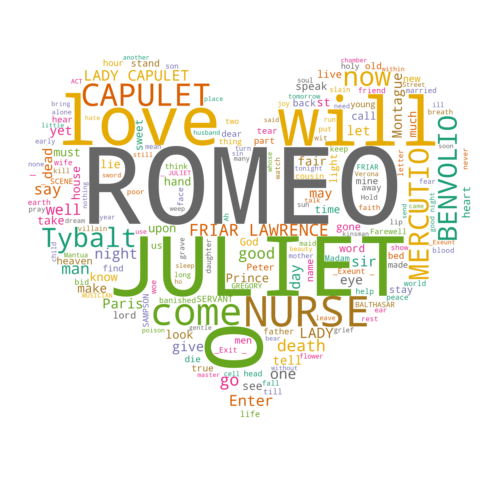

In [33]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

res = Path('resources')
text_path = res / 'RomeoAndJuliet.txt'
mask_path = res / 'mask_heart.png'
out_dir = res / 'outputs'
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / 'RomeoAndJuliet.png'

text = text_path.read_text(encoding='utf-8')

stopwords = set(STOPWORDS)
stopwords.update({
    'thou', 'thee', 'thy', 'thine', 'ye', 'hath', 'hast', 'doth',
    'dost', 'art', 'ere', 'nay', 'ay', 'yea', 'oft', 'wilt',
    'shalt', 'shouldst', 'wouldst', 'canst', 'couldst', 'mayst',
    'mightst', 'wert', 'whence', 'whither', 'hither', 'thither',
    'wherefore', 'tis', 'twas', "e'en", "e'er", "o'er", 'thyself',
    'prithee', 'anon', 'naught', 'aught', 'sirrah', 'marry', 'saith',
    'd', 's', 'll', 're', 've', 'm', 't'
})

mask_img = np.array(Image.open(mask_path))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=mask_img,
    colormap='Dark2',
    stopwords=stopwords
).generate(text)

wc.to_file(str(out_path))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Named Entity Recognition (NER) and Structured Outputs
### JSON Output for Named Entities
We’d like the Responses API to return its response in the JSON format shown below: 
```json
{
   "entities": [
      {
         "text": "Entity name",
         "tag": "Entity type"
      }
   ]
}
```

### Loading the Text

In [34]:
path = Path('resources') / 'web.txt'

In [35]:
text = path.read_text()

In [36]:
text

'The World Wide Web (simply called "the web") is a collection of hardware and software associated with the Internet that allows computer users to locate and view documents (with various combinations of text, graphics, animations, audios and videos) on almost any subject. In 1989, Tim Berners-Lee of CERN (the European Organization for Nuclear Research) began developing HyperText Markup Language (HTML)—the technology for sharing information via "hyperlinked" text documents. He also wrote communication protocols such as HyperText Transfer Protocol (HTTP) to form the backbone of his new hypertext information system, which he referred to as the World Wide Web. In 1994, Berners-Lee founded the World Wide Web Consortium (W3C, https://www.w3.org), which was devoted to developing web technologies. A key W3C goal is to make the web universally accessible to everyone regardless of disabilities, language or culture.'

### Performing NER on the Loaded Text

In [37]:
response = client.responses.create(
    model='gpt-5-mini',
    instructions="""You are an expert in named entity 
        recognition with the OntoNotes Named Entity Tag Set.""",
    input="""Analyze the supplied text and extract its named
        entities. Return only JSON in the following format:
            {
              "entities": [
                {
                  "text": "Entity name",
                  "tag": "Entity type"
                }
              ]
            }   
        Text to analyze:
        """ + text
)

### Deserializing the response 

In [38]:
import json

In [39]:
json_response = json.loads(response.output_text)

In [40]:
print(json.dumps(json_response, indent=2))

{
  "entities": [
    {
      "text": "The World Wide Web",
      "tag": "PRODUCT"
    },
    {
      "text": "the web",
      "tag": "PRODUCT"
    },
    {
      "text": "the Internet",
      "tag": "PRODUCT"
    },
    {
      "text": "1989",
      "tag": "DATE"
    },
    {
      "text": "Tim Berners-Lee",
      "tag": "PERSON"
    },
    {
      "text": "CERN",
      "tag": "ORG"
    },
    {
      "text": "the European Organization for Nuclear Research",
      "tag": "ORG"
    },
    {
      "text": "HyperText Markup Language",
      "tag": "PRODUCT"
    },
    {
      "text": "HTML",
      "tag": "PRODUCT"
    },
    {
      "text": "HyperText Transfer Protocol",
      "tag": "PRODUCT"
    },
    {
      "text": "HTTP",
      "tag": "PRODUCT"
    },
    {
      "text": "World Wide Web",
      "tag": "PRODUCT"
    },
    {
      "text": "1994",
      "tag": "DATE"
    },
    {
      "text": "Berners-Lee",
      "tag": "PERSON"
    },
    {
      "text": "World Wide Web Consortium"

# Speech Synthesis and Speech Recognition
## English Speech-to-Text for Audio Transcription

In [4]:
from speech_to_text import speech_to_text

In [6]:
audio_path = Path('resources') / 'outputs' / 'japanese.mp3'

In [7]:
transcript = speech_to_text(client, audio_path)

In [8]:
transcript

'今日はとても良い天気でした。明日は天気が悪くなりそうです。'

In [10]:
from translate import translate

In [ ]:
translate(cl

## Text-to-Speech

### Synthesizing and Playing English Speech in a Happy Tone

In [ ]:
from text_to_speech import text_to_speech

In [ ]:
english_text = (
    'Today was a beautiful day. Tomorrow looks like bad weather.')

In [ ]:
english_happy_path = (Path('resources') / 'outputs' / 
    'english_happy.mp3')

In [ ]:
text_to_speech(client, text=english_text, 
    path=english_happy_path, voice='ash', 
    instructions='Speak in a happy tone.')

In [ ]:
#from playsound import playsound

In [ ]:
#playsound(str(english_happy_path)) # autoplays the audio

In [ ]:
IPython.display.Audio(filename=english_happy_path) # displays an audio player

### Synthesizing and Playing English Speech in an Evil Tone

In [ ]:
english_evil_path = (Path('resources') / 'outputs' / 
    'english_evil.mp3')

In [ ]:
text_to_speech(client, text=english_text, 
    path=english_evil_path, voice='ash',
    instructions="""Speak as an evil supervillain and 
        end with an evil laugh.""")

In [ ]:
#playsound(str(english_evil_path))

In [ ]:
IPython.display.Audio(filename=english_evil_path)

### Synthesizing and Playing Spanish Speech 

In [ ]:
spanish_path = Path('resources') / 'outputs' / 'spanish.mp3'

In [ ]:
text_to_speech(client, text=spanish_text, 
    path=spanish_path, voice='ash')

In [ ]:
#playsound(str(spanish_path))

In [ ]:
IPython.display.Audio(filename=spanish_path)

### Synthesizing and Playing Japanese Speech

In [ ]:
japanese_path = Path('resources') / 'outputs' / 'japanese.mp3'

In [ ]:
text_to_speech(client, text=japanese_text, 
    path=japanese_path, voice='ash')

In [ ]:
playsound(str(japanese_path))

In [ ]:
IPython.display.Audio(filename=japanese_path)

# Image Generation


### `create_image` Function from `create_image.py`

### Image Size and Quality
* `'1024x1024'`
* `'1024x1536'`
* `'1536x1024'`
* `'auto'`

### Generating Images 

In [ ]:
from create_image import create_image

In [ ]:
anime_path = (Path('resources') / 'outputs' / 
    'havanese_anime.png')

In [ ]:
create_image(client, anime_path,
    """Havanese dog as a Japanese anime character
    in neon colors against a black background""")

In [ ]:
import IPython
IPython.display.Image(anime_path, width=500)

In [ ]:
vangogh_path = (Path('resources') / 'outputs' / 
    'havanese_vangogh.png')

In [ ]:
create_image(client, vangogh_path,
    'Havanese dog in the style of Vincent van Gogh')

In [ ]:
IPython.display.Image(vangogh_path, width=500)

In [ ]:
davinci_path = (Path('resources') / 'outputs' / 
    'havanese_davinci.png')

In [ ]:
create_image(client, davinci_path,
    'Havanese dog in the style of Leonardo DaVinci')

In [ ]:
IPython.display.Image(davinci_path, width=500)

### How Does gpt-image-1 Ensure Images Are Original?
We prompted ChatGPT with “How do you ensure that the images gpt-image-1 creates are original?” It responded as follows: Great question! Ensuring originality is important when generating images. Here’s how gpt-image-1 and similar generative models approach it:

1. Training Process—The model is trained on large collections of image–text pairs. Instead of copying or retrieving existing images, it learns patterns in textures, shapes, colors, and compositions. When prompted, it generates images by sampling from its learned internal representation—this process creates new combinations rather than reproducing stored pictures.
2. No Database Lookups—gpt-image-1 does not search the Internet or pull images from a library. It doesn’t retrieve or remix copyrighted works directly; instead, it generates pixels from scratch based on the statistical relationships it learned during training.
3. Randomness and Variation—Each generation includes stochastic sampling (randomness). Even with the same prompt, multiple images can differ in details, ensuring that outputs are not deterministic copies of training examples.
4. Safeguards—OpenAI implements filters and safety layers to reduce the chance of producing copyrighted, sensitive, or harmful material. The model avoids creating near-duplicates of specific, recognizable works or logos when prompted.
5. Human Oversight—For critical applications (e.g., commercial use), OpenAI recommends human review and, if needed, reverse image searches to confirm that the output isn’t too close to an existing copyrighted image.

In short: gpt-image-1 produces synthetic, original images guided by your prompt. It doesn’t copy or retrieve existing artworks but instead generates new imagery from learned patterns.

# Image Style Transfer 
## Style Transfer via the Images API’s Edit Capability and a Style-Transfer Prompt
### Function `restyle_with_images_api` from `image_edits.py`

In [ ]:
# import util

### Style-Transfer Prompt

In [ ]:
style_transfer_prompt = """
    Restyle the input photo into a vibrant swirling impasto 
    painting inspired by post-impressionist brushwork.  
    
    Medium/technique: thick acrylic paint with bold 
    palette-knife swipes and loaded brush strokes; swirling 
    arcs, rhythmic curves, comma-shaped dabs, and layered 
    ridges that give a tactile sheen (impasto).  
    
    Palette: luminous cobalt and ultramarine blues as the 
    dominant field; strong accents of golden yellow and amber; 
    secondary touches of teal and turquoise; minimal orange and 
    white highlights for contrast.  
    
    Composition: shallow depth, decorative and poster-flat; 
    energetic all-over brushwork that simplifies the subject 
    into flowing, abstracted shapes; swirls and curved strokes
    define contours and fur without precise detail.  
    
    Lighting & finish: very saturated, high contrast, minimal 
    shading; painterly, non-photorealistic.  
    
    Do/Don’t: maintain subject recognizability by silhouette and 
    major proportions; no text, no watermark, no signature; 
    avoid fine line drawing or photoreal textures."""

In [ ]:
style_transfer_prompt = """
    Restyle the input photo into a vibrant swirling impasto 
    painting inspired by post-impressionist brushwork.  
    
    Medium/technique: thick acrylic paint with bold 
    palette-knife swipes and loaded brush strokes; swirling 
    arcs, rhythmic curves, comma-shaped dabs, and layered 
    ridges that give a tactile sheen (impasto).  
    
    Palette: luminous cobalt and ultramarine blues as the 
    dominant field; strong accents of golden yellow and amber; 
    secondary touches of teal and turquoise; minimal orange and 
    white highlights for contrast.  
    
    Composition: shallow depth, decorative and poster-flat; 
    energetic all-over brushwork that simplifies the subject 
    into flowing, abstracted shapes; swirls and curved strokes
    define contours and fur without precise detail.  
    
    Lighting & finish: very saturated, high contrast, minimal 
    shading; painterly, non-photorealistic.  
    
    Do/Don’t: maintain subject recognizability by silhouette and 
    major proportions; no text; no signature; avoid fine line 
    drawing or photoreal textures."""

### Restyling the Photo

In [ ]:
style_path = Path('resources') / 'style1.jpg'

In [ ]:
photo_path = (
    Path('resources') / 'sunset.jpg')

In [ ]:
output_path = (
    Path('resources') / 'outputs' / 'styled_sunset.png')

In [ ]:
from image_edits import restyle_with_images_api

In [ ]:
def restyle_with_images_api(
    client, image_path, output_path, size, style_prompt):
    """Restyles a photo using a style prompt. 
    Uses gpt-image-1 via the Images Edits API. """

    # perform style-transfer edit via a text prompt
    with open(image_path, 'rb') as image_file:
        response = client.images.edit(model='gpt-image-1',
            image=image_file, size=size, prompt=style_prompt)

    # output bytes to path    
    output_path.write_bytes(base64.b64decode(response.data[0].b64_json))
    print(f'Image stored in:\n{output_path}')


In [ ]:
restyle_with_images_api(client, photo_path, 
    output_path, '1536x1024', style_transfer_prompt)

In [ ]:
IPython.display.Image(output_path)

## Style Transfer Via the Responses API’s Image Generation Tool

In [ ]:
style_path = Path('resources') / 'style1.jpg'

In [ ]:
output_path = (Path('resources') / 'outputs' /
    'styled_sunset_from_style1_image.png')

In [ ]:
from image_edits import restyle_with_responses_api

In [ ]:
import util
import base64

def restyle_with_responses_api(client, to_image_path, from_image_path, 
    output_path, size, style_prompt=None):
    """Restyles a photo using the style of another image 
    via the Responses API and the gpt-5-mini model."""

    prompt = f"""Apply the style of the second image to the first. 
        Keep the subject's identity and layout. Output size: {size}.
        Additional details from caller: {(style_prompt or 'None')}""" 

    response = client.responses.create(
        model='gpt-5-mini',
        tools=[{'type': 'image_generation'}],
        input=[{
            'role': 'user',
            'content': [
                {'type': 'input_text', 'text': prompt},
                {'type': 'input_image',
                 'image_url': util.create_data_url(to_image_path)},
                {'type': 'input_image',
                 'image_url': util.create_data_url(from_image_path)},
            ],
        }],
    )

    # get the image_generation tool result (base64-encoded PNG)
    image_calls = [output for output in response.output
                       if output.type == 'image_generation_call']

    if image_calls:
        base64_image = image_calls[0].result # Base64-encoded image
        Path(output_path).write_bytes(base64.b64decode(base64_image))
        print(f'Image stored in:\n{output_path}')
    else:
        print('No image generated')

In [ ]:
restyle_with_responses_api(client, photo_path, style_path, 
    output_path, size='1536x1024')

In [ ]:
IPython.display.Image(output_path)

### `restyle_with_responses_api` Function from `image_edits.py`

# Video 
## Generating Video Closed Captions 
### `speech_to_vtt` Function from `speech_to_vtt.py`
### Transcribing the Audio and Saving the Captions 


In [ ]:
audio_path = Path('resources') / 'Python2e_01_02.m4a'

In [ ]:
from speech_to_vtt import speech_to_vtt

In [ ]:
captions = speech_to_vtt(client, audio_path)

In [ ]:
print(captions)

In [ ]:
vtt_path = Path('resources') / 'outputs' / 'Python2e_02_01.vtt'

In [ ]:
with open(vtt_path, 'w') as vtt_file:
    print(captions, file=vtt_file)

## Sora
* No API yet
## Azure OpenAI Sora API
* Access through certain regions' servers (e.g., US East 2)
## Other Video GenAIs
* Adobe Firefly (https://firefly.adobe.com) 
* Meta Movie Gen (https://ai.meta.com/research/movie-gen/) 
* Google’s Veo 3 (https://deepmind.google/models/veo/) 
* InVideo (https://invideo.io/) 

# Content Moderation
### `check_prompt` and `display_moderation_result` functions
### Demonstrating Moderation with a String That Is Not Flagged

In [ ]:
from moderation import check_prompt, \
    display_moderation_results

In [ ]:
result = check_prompt(client,
    'I would kill for an ice cream sundae right now.')

In [ ]:
display_moderation_results(result)

### Demonstrating Moderation with a String That Is Flagged

In [ ]:
result = check_prompt(client, "I'm going to make them pay.")

In [ ]:
display_moderation_results(result)

## Passing Images to the Moderation API
### Moderation Criteria Sources
We asked ChatGPT where the Moderation API’s criteria are drawn from. It responded with the following:
1. Policy-Based Development with GPT-4 Assistance—OpenAI develops its moderation criteria through an iterative, policy-first process. Content policy experts craft and refine guidelines—what constitutes disallowed content. These policies are then fed to, and refined by, GPT-4, which learns to interpret and label data consistently according to those policies 
2. Training via Curated Taxonomy and Labeled Data—The Moderation API’s model is trained on a carefully structured taxonomy, covering broad categories like sexual content, hate, violence, self-harm, and harassment, along with granularity in subcategories (e.g., sexual content involving minors vs. graphic violence.) This training relies on high-quality, labeled datasets, active learning to capture rare harmful content, and rigorous data quality control processes 
3. Model Refinement and Active Learning—OpenAI’s moderation models are continuously improved using active learning and production data: rare or ambiguous flagged content is incorporated into new training, enabling the system to adapt and improve over time 
4. Model Application to New Content—When applied, the Moderation API assesses input against these trained categories—hate, harassment, self-harm, sexual, sexual/minors, violence, violence/graphic, etc.—and flags content that violates the established policy guidelines 

In [ ]:
from moderation import check_image

In [ ]:
result = check_image(client, url) # Insert string URL of an image containing flaggable content

### Sample Output for a Self-Harm Image

> `Offensive content categories & scores:`  
> `               harassment: False 0.00`  
> `   harassment/threatening: False 0.00`  
> `                     hate: False 0.00`  
> `         hate/threatening: False 0.00`  
> `                  illicit: False 0.00`  
> `          illicit/violent: False 0.00`  
> **`                self-harm:  True 0.86`**  
> `   self-harm/instructions: False 0.00`  
> `         self-harm/intent: False 0.01`  
> `                   sexual: False 0.00`  
> `            sexual/minors: False 0.00`  
> **`                 violence:  True 0.60`**  
> `         violence/graphic: False 0.01`


<hr/>

# Google Veo Video Generation
* https://ai.google.dev/gemini-api/docs
* `conda install google`

In [ ]:
import keys

In [ ]:
from google import genai

## Create a `Client` Object 
* Autoloads `GEMINI_API_KEY` from your environment
* Can also pass the keyword argument `api_key='Your_API_Key'`

In [ ]:
client = genai.Client(api_key=keys.GEMINI_API_KEY_PAID)

In [ ]:
client = genai.Client(api_key=keys.GEMINI_API_KEY_FREE)

## Generating an Image

In [ ]:
response = client.models.generate_content(
    model='gemini-2.5-flash-image-preview',
    contents=['Havanese dog in the style of Vincent van Gogh']
)

In [ ]:
from PIL import Image
from io import BytesIO
import IPython
from pathlib import Path

In [ ]:
for part in response.candidates[0].content.parts:
    if part.text is not None:
        print(part.text)
    elif part.inline_data is not None:
        path = Path('resources') / 'outputs' / 'gemini_van_gogh.png'
        image = Image.open(BytesIO(part.inline_data.data))
        image.save("generated_image.png")

In [ ]:
path = Path('resources') / 'outputs' / 'gemini_van_gogh.png'
image = Image.open(BytesIO(part.inline_data.data))
image.save(path)

In [ ]:
IPython.display.Image(path)

## Submitting a Video Generation Request

In [ ]:
from google.genai import types
import time

In [ ]:
operation = client.models.generate_videos(
    model="veo-3.0-fast-generate-001",
    source=types.GenerateVideosSource(
        prompt="A neon hologram of a cat driving at top speed",
    ),
)

while not operation.done:
    time.sleep(10)
    operation = client.operations.get(operation)

operation.result.generated_videos[0].video.uri

<hr/>
&copy; 2025 by Deitel & Associates, Inc. All Rights Reserved. 